<a href="https://colab.research.google.com/github/groda/big_data/blob/master/SLURM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://github.com/groda/big_data"><div><img src="https://github.com/groda/big_data/blob/master/logo_bdb.png?raw=true" align=right width="90" alt="Logo Big Data for Beginners"></div></a>
# SLURM Demonstration: Unleashing Parallel Computing

<div width="110"><img src="https://github.com/groda/big_data/blob/master/Slurm_logo.svg.png?raw=true" align=left width="90" style="margin:30px" alt="SLURM logo"/></div>


 **SLURM** is an acronym for **S**imple **L**inux **U**tility for **R**esource **M**anagement. The name reflects its original design goal of being a straightforward yet powerful tool for managing Linux cluster resources.

This demonstration walks you through setting up, configuring, and using SLURM on a single Ubuntu virtual machine (VM), providing a hands-on introduction to its features for high-performance computing (HPC) environments.

We’ll explore how to set up and harness SLURM’s job scheduling capabilities, whether you’re using Google Colab’s cloud environment or your own virtual machine (VM). From submitting jobs to verifying parallel execution, you’ll learn to leverage SLURM for efficient computation—perfect for your single-node Docker setup or beyond.

To make navigation easier:
- **🚀 Critical Steps**: Sections marked with the 🚀 emoji highlight essential tasks, such as installation and configuration, that are crucial for setting up and running SLURM. Follow these steps carefully to ensure a successful deployment.
- **📝 Side Notes**: Sections marked with the 📝 emoji contain optional, supplementary information, such as historical context or additional tips. These can be skipped if you’re focused on the core setup process but are expandable for deeper insights.

Get ready to dive into the power of SLURM for parallel computing and supercharge your workflows!





## Table of Contents

- [🚀 Install the SLURM Packages](#scrollTo=2QpF7XoRzry7)
- [📝 Side Note: What is slurm-wlm?](#scrollTo=brQkWtmMi786)
- [📝 Side Note: A Brief History of SLURM](#scrollTo=31Q0HgWMK19o)
- [📝 Side Note: Debian's sid and SLURM](#scrollTo=VFtQ9QQgj98S)
- [📝 Side Note: Nerdy Names, Serious Systems](#scrollTo=_Side_Note_Nerdy_Names_Serious_Systems)
- [🚀 Configuration](#scrollTo=BhhgV7kNYT7c)
- [📝 Configure using slurm-wlm-configurator.html](#scrollTo=XhJQeLeT99Tz)
- [🚀 Generate a `munge` key](#scrollTo=3d8C0ay3Xa-d)
- [🚀 Create Spool Directories](#scrollTo=fgqo9xAZXxYS)
- [🚀 Start the Services](#scrollTo=gFMWSBKBX7Yl)
- [🚀 Verify Cluster Status](#scrollTo=92wZzJmSfK35)
- [📝 Useful Commands for Debugging](#scrollTo=rNeusBTLcqve)
- [🚀 Run a simple job](#scrollTo=Ua-nBgvmsJpA)
- [🚀 Did the Job Run in Parallel?](#scrollTo=1DAjlH9ltWXj)
- [🚀 Single-task parallel Python with `multiprocessing` and `--cpus-per-task`](#scrollTo=uH60mvkDzzFk)
- [🚀 Run multiple tasks with `srun`](#scrollTo=Jnx75guCFmZk)
- [🚀 SLURM Job Arrays](#scrollTo=H-QTevQSJjJM)



## 🚀 Install the SLURM Packages

This might take a few seconds ...
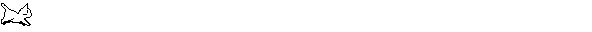

In [1]:
!sudo apt-get update && sudo sudo apt-get install slurm-wlm -y

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 https://cli.github.com/packages stable InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
slurm-wlm is already the newest version (21.08.5-2ubuntu1).
0 upgraded, 0 newly installed, 0 t

You can use the `scontrol version` command to find out the installed SLURM version.

In [2]:
!scontrol version

slurm-wlm 21.08.5


## 📝 Side Note: What is `slurm-wlm`?

`slurm-wlm` is the Debian package for SLURM and it is an unofficial distribution from **SchedMD**'s perspective (SchedMD is the company that develops and maintains the open-source Slurm Workload Manager).

According to the [Slurm Quick Start Administrator Guide](https://slurm.schedmd.com/quickstart_admin.html#quick_start), SchedMD explicitly notes:

> **NOTE**: Some Linux distributions may have unofficial Slurm packages available in software repositories. SchedMD does not maintain or recommend these packages.

Some of the reasons why SchedMD does not recommend inofficial builds might be:

1. **SchedMD Does Not Maintain It**: The `slurm-wlm` package is maintained by the Debian community, not by SchedMD, the official developers of Slurm. Debian maintainers build and package Slurm for inclusion in their repositories, which may include modifications or configurations that differ from SchedMD's official releases.

2. **Potential for Issues**: Unofficial packages may not always align with SchedMD's latest recommendations, configurations, or patches. This can lead to compatibility issues, missing features, or differences in behavior compared to SchedMD's official builds.

3. **SchedMD's Recommendation**: SchedMD recommends building Slurm from source or using RPM/DEB packages built directly from their official tarballs (e.g., using `rpmbuild` or `debuild` as described in the guide). This ensures full control over the build process, dependencies, and configuration, tailored to the user's specific cluster needs.

Despite SchedMD's recommendation against unofficial packages, users might choose Debian's `slurm-wlm` for convenience, especially in environments already integrated with Debian's package management system (`apt`). Benefits include:

- **Ease of Installation**: Installing `slurm-wlm` via `apt` is simpler than building from source or creating custom packages.
- **Dependency Management**: Debian's package manager automatically handles dependencies like `munge`, `mysql`, or other required libraries.
- **System Integration**: The package is configured to work with Debian's conventions (e.g., systemd services, file paths like `/etc/slurm/` for configuration).

However, users should be cautious:

- **Version Lag**: Debian's `sid` repository may not always have the latest Slurm version. For example, as of October 12, 2025, `slurm-wlm` is at version `24.11.5-4`, which is recent but may lag behind SchedMD's latest releases.
- **Customizations**: Debian's package may include patches or configurations not endorsed by SchedMD, potentially affecting behavior.
- **Support**: Issues with Debian's package would need to be addressed through Debian's bug tracker rather than SchedMD's support channels.


## 📝 Side Note: A Brief History of SLURM


Slurm was first developed in 2001 at **Lawrence Livermore National Laboratory (LLNL)** to manage large Linux clusters for high-performance computing (HPC). The first formal publication of Slurm appeared in a 2003 paper by Yoo, A.B., Jette, M.A., and Grondona, M., titled "SLURM: Simple Linux Utility for Resource Management," presented at the Workshop on Job Scheduling Strategies for Parallel Processing (published in Lecture Notes in Computer Science, pp. 44–60, Springer Berlin Heidelberg). This paper introduced Slurm’s design principles, emphasizing its lightweight architecture and adaptability and it is available at [https://www.osti.gov/servlets/purl/15002533](https://www.osti.gov/servlets/purl/15002533).

Slurm was designed as a lightweight, scalable alternative to existing resource managers. Over the years, SLURM gained popularity in the HPC community, with significant adoption by supercomputing centers. Key milestones include the introduction of the REST API in 2020 and support for JWT authentication in 2023.

In terms of scheduling, SLURM has evolved from initially only supporting FIFO to:
- **Multifactor Priority Scheduling**, where multiple factors such as quality of service, age, size, _fairshare_, are taken into account when prioritizing jobs
- **Backfill Scheduling**, allowing smaller, shorter jobs to “fill in” gaps in the schedule while waiting for larger jobs to acquire sufficient resources
- **Preemption**, where higher-priority jobs can interrupt or suspend lower-priority jobs to access resources immediately
- **Advanced Resource Allocation**: SLURM can allocate exactly the resources a job needs—CPUs, GPUs, memory, licenses, or even specific nodes—down to the socket or core level
- **Burst Buffer Support**: fast intermediate storage (e.g., NVMe SSDs) placed between RAM and parallel filesystem to speed up I/O-heavy jobs without flooding slow storage
- **Cloud & Elastic Computing**: automatically spin up/down cloud nodes (AWS, Azure, GCP) when on-prem resources are full
- **Container Support**: run jobs inside Docker, Singularity/Apptainer, or Podman containers directly via SLURM to ensures reproducible, portable, secure software environments

Today, SLURM powers some of the world's largest supercomputers.



## 📝 Side Note: Debian's `sid` and SLURM

Debian's versioning includes **stable** (e.g., `bookworm`), **testing** (e.g., `trixie`), and **unstable** (`sid`) branches. The `sid` branch, named after the mischievous character Sid from Toy Story (1995, Pixar Animation Studios), who breaks toys and creates chaos, reflects its role as Debian's cutting-edge, unstable repository where packages are continuously updated. As noted in Debian's documentation, `sid` is a development playground, prone to breakages but offering the latest software versions, like `slurm-wlm` version `24.11.5-4` as of October 2025.

Users might choose `slurm-wlm` from `sid` for its recent SLURM features, such as enhanced GPU autodetection (`AutoDetect=nvml` for NVIDIA GPUs) or REST API improvements (`slurmrestd`), which may not yet be in `bookworm` (e.g., `23.02.x`). Its integration with Debian’s `apt` simplifies installation and dependency management (e.g., `munge`, `mysql`). However, `sid`’s instability—akin to Sid’s destructive antics in Toy Story—makes it risky for production HPC clusters, as updates can introduce bugs or dependency conflicts. For testing or research environments needing the latest SLURM capabilities, `sid` is appealing, but SchedMD recommends building from source for reliability and official support.

## 📝 Side Note: Nerdy Names, Serious Systems



While SLURM stands for Simple Linux Utility for Resource Management it also nods to *Slurm*, the soft drink in *Futurama*.

I notice more and more how deeply tech culture is shaped by the tastes and humor of a specific group — mostly young, male “nerds.” Debian versions named after *Toy Story* characters, SLURM taking its name from a beverage in *Futurama* — these choices aren’t random. They reveal a shared subculture that has long defined open-source and DevOps communities.

What started as playful references among enthusiasts has become a kind of tradition — a way of signaling identity and belonging. The same spirit shows up in projects like **Borg** (_Star Trek_) or **Python** (_Monty Python’s Flying Circus_). It’s a mix of wit, nostalgia, and a sense of “if you get the joke, you’re one of us.”

It encodes a certain kind of taste and belonging: if you recognize *Toy Story*, *Futurama*, *Star Wars*, or *Monty Python* jokes, you’re in the club. If not, you’re subtly reminded that the culture wasn’t built with you in mind. It’s not malicious, but it is a reflection of a narrow demographic shaping the collective tone of open-source and DevOps culture. And that tone often persists even as the field itself has become more diverse and mature.

There’s an interesting contrast here: these projects embody serious technical excellence, yet their cultural expression is stuck in a kind of perpetual adolescence — like an in-joke from a college dorm that somehow became global infrastructure.

This tendency, however, is mostly a relic of the early days of computer science up through the 1990s, when the field was dominated by a small, highly homogeneous group of enthusiasts steeped in science fiction, comics, and arcade culture. Modern technologies increasingly break away from this “nerd comics” culture, opting instead for names that are descriptive, abstract, or evocative. Examples include *Terraform*, *Docker*, *Kubernetes*, *Airflow*, *Figma*, *Notion*, and *Snowflake* — names that signal function, creativity, or metaphor rather than relying on insider pop-culture knowledge.

Perhaps what could be wished for is simply more freedom to break away from that established mold. Tech doesn’t have to lose its sense of humor to grow up a little. It can remain creative and irreverent, while exploring names, metaphors, and references that reflect the wider, richer world of ideas around it.

## 🚀 Configuration

Configuration instructions are provided in `/usr/share/doc/slurmctld/README.Debian`.

In [3]:
!cat /usr/share/doc/slurmctld/README.Debian

Configuration Instructions
In order to use SLURM you need a proper configuration file for your
cluster that need to be stored under /etc/slurm/slurm.conf on every
node. You can point your browser to
file:///usr/share/doc/slurmctld/slurm-wlm-configurator.html for an
automatic configuration tool. Please leave red fields untouched and
change green field to fit your cluster configuration.

You can also find a simple sample configuration that provides a
control machine to run the Slurm's central management daemon and
a single node for job execution under
/usr/share/doc/slurmctld/examples/slurm.conf.simple.gz


We are going to create a file `slurm.conf`.

For convenience, create a symbolic link to the folder `/etc/slurm` so that the file can be opened from the left pane in Google Colab's Jupyterhub interface.

In [4]:
!sudo ln -sf /etc/slurm ./

4 CPUs, 7923 MB RAM):

In [5]:
%%writefile temp_slurm.conf
# Minimal slurm.conf for single-node testing
ClusterName=mylocalcluster
SlurmctldHost=localhost
AuthType=auth/munge
MpiDefault=none
ProctrackType=proctrack/linuxproc
ReturnToService=2
SlurmctldPidFile=/var/run/slurmctld.pid
SlurmctldPort=6817
SlurmdPidFile=/var/run/slurmd.pid
SlurmdPort=6818
StateSaveLocation=/var/spool/slurmctld
SlurmdSpoolDir=/var/spool/slurmd
SlurmUser=slurm
SlurmdLogFile=/var/log/slurmd.log
SlurmctldLogFile=/var/log/slurmctld.log
# Node and partition configuration
NodeName=localhost CPUs=2 RealMemory=7923 State=UNKNOWN
PartitionName=LocalQ Nodes=localhost Default=YES MaxTime=INFINITE State=UP

Writing temp_slurm.conf


In [6]:
# 2. Use sudo to move temp_slurm.conf to the protected system directory
!sudo mv temp_slurm.conf /etc/slurm/slurm.conf

Verify your config: NodeName, ControlMachine, and PartitionName.Nodes must match either `localhost` or `hostname -s`.

## 📝 Configure using `slurm-wlm-configurator.html`

Instead of editing the configuration file `slurm.conf` you could also start a minimal Web app. This is an overkill for the current demonstration but it might be interesting to see all possible SLURM configuration parameters.

Begin by creating a minimal Flask Web application.

In [7]:
%%writefile run_flask.py
from flask import Flask, Response
app = Flask(__name__)

@app.route('/')
def serve_configurator():
   try:
       with open('/usr/share/doc/slurmctld/slurm-wlm-configurator.html', 'r') as f:
           html_content = f.read()
       return Response(html_content, mimetype='text/html')
   except FileNotFoundError:
       return "Error: slurm-wlm-configurator.html not found", 404

if __name__ == '__main__':
   app.run()

Overwriting run_flask.py


In [8]:
import subprocess
import os
import signal

# Check if the process is running and terminate it
if 'process' in locals() and process.poll() is None:
    print("Terminating existing Flask process...")
    process.terminate()

with open('flask.out', "w") as stdout_file, open('flask.err', "w") as stderr_file:
    process = subprocess.Popen(
        ["python", "run_flask.py"],
        stdout=stdout_file,
        stderr=stderr_file,
        preexec_fn=os.setsid  # Start the process in a new session
    )

Serve the Web app through `output` (only works if in Google Colab). Click on the link below.

In [9]:
import sys
# true if running on Google Colab
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
  from google.colab import output
  output.serve_kernel_port_as_window(5000)

Try `serve_kernel_port_as_iframe` instead. 


<IPython.core.display.Javascript object>

In [10]:
!hostname -s

b710c5a06c09


## 🚀 Generate a `munge` key

MUNGE stands for **M**ac-based **U**ser **N**ame **G**roup **E**xpiration and it is a lightweight, high-performance authentication system used by SLURM to securely verify user identity (UID/GID) and message integrity across cluster nodes using a shared symmetric key and time-limited credentials. It ensures fast, trusted communication between SLURM daemons and clients with minimal overhead.

Generate a secure, random 1024-byte shared key for MUNGE authentication.

In [11]:
%%bash
sudo dd if=/dev/urandom of=/etc/munge/munge.key bs=1 count=1024 >/dev/null 2>&1
sudo chown munge:munge /etc/munge/munge.key
sudo chmod 400 /etc/munge/munge.key


## 🚀 Create Spool Directories

In [12]:
%%bash
sudo mkdir -p /var/spool/slurmctld /var/spool/slurmd /var/lib/munge
sudo chown slurm:slurm /var/spool/slurm{ctld,d} /var/lib/munge
sudo chown munge:munge /var/lib/munge
sudo chmod 755 /var/spool/slurm* /var/lib/munge

> ### 📌 Recap: installation
> - On Ubuntu, install the unofficial Debian package for SLURM with the command `apt install slurm-wlm -y`
> - A minimal configuration requires creating a `slurm.conf` file, a `munge` key, and spool directories.

## 🚀 Start the Services

Skip the next step if you are launching the services for the first time.

In [13]:
%%bash
sudo service munge stop
sudo service slurmctld stop
sudo service slurmd stop

 * Stopping MUNGE munged
   ...done.
 * Stopping slurm central management daemon slurmctld
   ...done.
 * Stopping slurm compute node daemon slurmd
   ...done.
slurmd is stopped


In [14]:
%%bash
sudo service munge start
sudo service slurmctld start
sudo service slurmd start

 * Starting MUNGE munged
   ...done.
 * Starting slurm central management daemon slurmctld
   ...done.
 * Starting slurm compute node daemon slurmd
   ...done.


## 🚀 Verify Cluster Status

In [15]:
!sinfo

PARTITION AVAIL  TIMELIMIT  NODES  STATE NODELIST
LocalQ*      up   infinite      1   idle localhost


You should see something like
```
PARTITION AVAIL  TIMELIMIT  NODES  STATE NODELIST
LocalQ*      up   infinite      1   idle localhost
```

This is a 1-node cluster with no time limit for jobs.

If the node is not idle, set it:

In [16]:
!sudo scontrol update NodeName=6d91971d1d4a State=IDLE

## 📝 Useful Commands for Debugging

To look for errors you can use:

- `tail /var/log/slurmctld.log` to view the end of the `slurmctld` log file.
- `grep "error" /var/log/slurmctld.log` to search for specific terms like "error" in the log file.
- `sudo -u slurm /usr/sbin/slurmctld -D -vvv` for streaming output to the console



In [17]:
!grep "error" /var/log/slurmctld.log

[2026-03-01T18:01:05.547] error: chdir(/var/log): Permission denied
[2026-03-01T18:01:05.547] error: Configured MailProg is invalid
[2026-03-01T18:01:05.559] error: Could not open node state file /var/spool/slurmctld/node_state: No such file or directory
[2026-03-01T18:01:05.559] error: NOTE: Trying backup state save file. Information may be lost!
[2026-03-01T18:01:05.560] error: Could not open job state file /var/spool/slurmctld/job_state: No such file or directory
[2026-03-01T18:01:05.560] error: NOTE: Trying backup state save file. Jobs may be lost!
[2026-03-01T18:01:05.560] error: Could not open reservation state file /var/spool/slurmctld/resv_state: No such file or directory
[2026-03-01T18:01:05.560] error: NOTE: Trying backup state save file. Reservations may be lost
[2026-03-01T18:01:05.560] error: Could not open trigger state file /var/spool/slurmctld/trigger_state: No such file or directory
[2026-03-01T18:01:05.560] error: NOTE: Trying backup state save file. Triggers may be l

> ## 📌 Recap: start SLURM
> - Three services need to be started: `munge`, `slurmctld`, and `slurmd`.
> - Use `sinfo` to verify the cluster status.

## 🚀 Run a simple job

To run a SLURM job, you generally embed _SLURM directives_ inside a shell script. This script tells SLURM what resources you need and what commands to execute.

The script must start with #!/bin/bash or another valid shell.

All SLURM directives start with `#SBATCH` and must appear at the top of the script before any commands. For instance the following directives
```
#!/bin/bash
#SBATCH --partition=LocalQ
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=2
#SBATCH --mem=100M
```
tell SLURM:
- to run the job in partition (queue) `LocalQ` (we chose this name in the configuration file);
- to run one task (one single process) with $2$ CPU cores for each task;
- to request $100$ megabytes of RAM—SLURM will reserve this amount and prevent your job from exceeding it. Depending on how memory constraints are configured, if your program uses more memory than requested, it may be terminated.

After the `#SBATCH` directives, you can write normal shell commands.

⚠️ Be careful not insert blank lines between the shebang (`#!/bin/bash`) and the directives (`#SBATCH`) otherwise SLURM will ignore them!

This is a bash script that computes the sum of the first $100$ numbers.

In [18]:
%%writefile simple_job.sh
#!/bin/bash
#SBATCH --partition=LocalQ
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=2
#SBATCH --mem=100M

echo "Job started on $(hostname) at $(date)"
echo "Running on node: $SLURM_NODELIST"
echo "Job ID: $SLURM_JOB_ID"
echo "Calculating sum of numbers 1 to 100..."
sum=0
for i in {1..100}; do
    sum=$((sum + i))
done
echo "Sum: $sum"
sleep 5
echo "Job finished at $(date)"

Writing simple_job.sh


In [19]:
%%bash
chmod +x simple_job.sh
sbatch simple_job.sh
sleep 5

Submitted batch job 1


In [20]:
!ls slurm-*.out

slurm-1.out


In [21]:
!cat slurm-1.out

Job started on b710c5a06c09 at Sun Mar  1 06:02:25 PM UTC 2026
Running on node: localhost
Job ID: 1
Calculating sum of numbers 1 to 100...
Sum: 5050


Check if the result is correct

In [22]:
100*101/2

5050.0

## 🚀 Did the Job Run in Parallel?

In [23]:
!scontrol show job 1

JobId=1 JobName=simple_job.sh
   UserId=root(0) GroupId=root(0) MCS_label=N/A
   Priority=4294901759 Nice=0 Account=(null) QOS=(null)
   JobState=RUNNING Reason=None Dependency=(null)
   Requeue=1 Restarts=0 BatchFlag=1 Reboot=0 ExitCode=0:0
   RunTime=00:00:03 TimeLimit=UNLIMITED TimeMin=N/A
   SubmitTime=2026-03-01T18:02:23 EligibleTime=2026-03-01T18:02:23
   AccrueTime=2026-03-01T18:02:23
   StartTime=2026-03-01T18:02:25 EndTime=Unknown Deadline=N/A
   SuspendTime=None SecsPreSuspend=0 LastSchedEval=2026-03-01T18:02:25 Scheduler=Main
   Partition=LocalQ AllocNode:Sid=b710c5a06c09:3447
   ReqNodeList=(null) ExcNodeList=(null)
   NodeList=localhost
   BatchHost=localhost
   NumNodes=1 NumCPUs=2 NumTasks=1 CPUs/Task=2 ReqB:S:C:T=0:0:*:*
   TRES=cpu=2,node=1,billing=2
   Socks/Node=* NtasksPerN:B:S:C=0:0:*:* CoreSpec=*
   MinCPUsNode=2 MinMemoryNode=100M MinTmpDiskNode=0
   Features=(null) DelayBoot=00:00:00
   OverSubscribe=NO Contiguous=0 Licenses=(null) Network=(null)
   Command=/con

The line
```
NumNodes=1 NumCPUs=2 NumTasks=1 CPUs/Task=2 ...
```
confirms that SLURM reserved 2 CPUs for our job.

But this doesn't mean that the job used the two CPUs for parallel computation since our script `simple_job.sh` is a sequential Bash loop (`for i in {1..100}`) that runs on a single process/thread.

The option `--cpus-per-task=2` means that SLURM allocates 2 CPUs to the job and that other jobs can’t use them, but the script’s computation remains single-threaded.

> ## 📌 Recap: SLURM doesn't parallelize your code for you
> SLURM just hooks you up with resources like CPUs or machines. If your program’s single-threaded, it’ll stick to one CPU unless you make it parallel.


**Note:** The `scontrol show job` command primarily shows information about jobs that are currently running or have recently completed and are still held in SLURM's internal state. This information is not retained indefinitely.

For long-term retention of job information, SLURM uses an accounting database that needs to be installed extra and can be queried with `sacct`). The retention period for job information in the accounting database is determined by the SLURM accounting configuration.

## 🚀  Single-task parallel Python with `multiprocessing` and `--cpus-per-task`

Let us modify the script so that it runs in parallel on the two CPUs. In order to achieve this, let us use Python's `multiprocessing` library. Note that we still need to wrap our code inside a shell script.

In [24]:
%%writefile simple_job_parallel.sh
#!/bin/bash
#SBATCH --partition=LocalQ
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=2
#SBATCH --mem=100M

echo "Job started on $(hostname) at $(date)"
echo "Running on node: $SLURM_NODELIST"
echo "Job ID: $SLURM_JOB_ID"
echo "Calculating sum of numbers 1 to 100 in parallel with Python..."

python3 -c "
from multiprocessing import Pool
def add(x): return x
with Pool(processes=2) as pool:
    result = sum(pool.map(add, range(1, 101)))
print(f'Sum: {result}')
"

sleep 10
echo "Job finished at $(date)"

Writing simple_job_parallel.sh


In [25]:
%%bash --out id
sbatch simple_job_parallel.sh

In [26]:
!echo {id}

Submitted batch job 2


In [27]:
JOB_ID = id.split()[-1]

In [28]:
!cat slurm-{JOB_ID}.out

cat: slurm-2.out: No such file or directory


Let us introduce some logging to view the parallel processing.

In [29]:
%%writefile simple_job_parallel.sh
#!/bin/bash
#SBATCH --job-name="Run in Parallel"  # name of the job
#SBATCH --partition=LocalQ
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=2
#SBATCH --mem=100M
#SBATCH --time=00:02:00               # HH:MM:SS format

# Ensure psutil is installed
if ! python3 -c "import psutil" 2>/dev/null; then
    sudo apt update && sudo apt install -y python3-psutil
fi

echo "Job started on $(hostname) at $(date)"
echo "Running on node: $SLURM_NODELIST"
echo "Job ID: $SLURM_JOB_ID"
echo "Calculating sum of numbers from 1 to 100 in parallel with Python..."

python3 -c "
import multiprocessing as mp
import psutil
import os
import time

def add(x):
    # Log PID and CPU affinity
    process = psutil.Process()
    cpu_affinity = process.cpu_affinity()
    start_time = time.ctime(process.create_time())
    print(f'Process PID={os.getpid()}, CPU affinity={cpu_affinity}, Start time={start_time}, x={x}')
    return x

if __name__ == '__main__':
    with mp.Pool(processes=2) as pool:
        result = sum(pool.map(add, range(1, 101)))
    print(f'Sum of numbers: {result}')
"

sleep 10
echo "Job finished at $(date)"

Overwriting simple_job_parallel.sh


In [30]:
%%bash --out id
sbatch simple_job_parallel.sh

In [31]:
!echo {id}

Submitted batch job 3


**Note:** the number of processes (defined in `Pool(processes=2)`) should not exceed the CPUs reserved in SLURM (`--cpus-per-task=2`), otherwise some processes might have to wait while the maximum $2$ CPUs available simultaneosly are busy. Running more parallel processes than the number of CPUs reserved (via `--cpus-per-task`) is called _oversubscription_. The job might still complete if there is enough available memory, but it will be slowed down.

In [32]:
JOB_ID = id.split()[-1]

In [33]:
import time

# Wait for the job to finish
while True:
    result = !squeue -j {JOB_ID} -h
    if not result:  # squeue returns empty if job is not in queue
        print(f"Job {JOB_ID} finished.")
        break
    else:
        print(f"Waiting for job {JOB_ID} to finish...")
        print("\n".join(result))
        time.sleep(5) # Wait for 5 seconds before checking again

# After the job is finished, you can view the output files
!cat slurm-{JOB_ID}.out

Waiting for job 3 to finish...
                 3    LocalQ Run in P     root PD       0:00      1 (Resources)
Waiting for job 3 to finish...
                 3    LocalQ Run in P     root PD       0:00      1 (Resources)
Waiting for job 3 to finish...
                 3    LocalQ Run in P     root PD       0:00      1 (Resources)
Waiting for job 3 to finish...
                 3    LocalQ Run in P     root  R       0:03      1 localhost
Waiting for job 3 to finish...
                 3    LocalQ Run in P     root  R       0:08      1 localhost
Job 3 finished.
Job started on b710c5a06c09 at Sun Mar  1 06:02:41 PM UTC 2026
Running on node: localhost
Job ID: 3
Calculating sum of numbers from 1 to 100 in parallel with Python...
Sum of numbers: 5050
Job finished at Sun Mar  1 06:02:51 PM UTC 2026


We can now see that two processes were spawned:

In [34]:
!cut -d' ' -f2 slurm-{JOB_ID}.out |grep PID| sort | uniq

We can also see which numbers were picked by each process:

In [35]:
!cut -d' ' -f2,12 slurm-{JOB_ID}.out |grep PID| sort | uniq -f1

In [36]:
!scontrol show job {JOB_ID}

JobId=3 JobName=Run in Parallel
   UserId=root(0) GroupId=root(0) MCS_label=N/A
   Priority=4294901757 Nice=0 Account=(null) QOS=(null)
   JobState=COMPLETED Reason=None Dependency=(null)
   Requeue=1 Restarts=0 BatchFlag=1 Reboot=0 ExitCode=0:0
   RunTime=00:00:10 TimeLimit=00:02:00 TimeMin=N/A
   SubmitTime=2026-03-01T18:02:29 EligibleTime=2026-03-01T18:02:29
   AccrueTime=2026-03-01T18:02:29
   StartTime=2026-03-01T18:02:41 EndTime=2026-03-01T18:02:51 Deadline=N/A
   SuspendTime=None SecsPreSuspend=0 LastSchedEval=2026-03-01T18:02:41 Scheduler=Main
   Partition=LocalQ AllocNode:Sid=b710c5a06c09:3447
   ReqNodeList=(null) ExcNodeList=(null)
   NodeList=localhost
   BatchHost=localhost
   NumNodes=1 NumCPUs=2 NumTasks=1 CPUs/Task=2 ReqB:S:C:T=0:0:*:*
   TRES=cpu=2,node=1,billing=2
   Socks/Node=* NtasksPerN:B:S:C=0:0:*:* CoreSpec=*
   MinCPUsNode=2 MinMemoryNode=100M MinTmpDiskNode=0
   Features=(null) DelayBoot=00:00:00
   OverSubscribe=NO Contiguous=0 Licenses=(null) Network=(null)


**Note:** Python's `multiprocessing.Pool.map()` automatically splits the computation into chunks (works for **any iterable**, not just numbers):
* `range(1, 101)` → 100 items: 1, 2, 3, …, 100
* `Pool(processes=2)` → creates **2 worker processes**
* `pool.map(add, range(1, 101))` splits the 100 items and for 2 processes, it might assign roughly:
    | Process  | Items  |
    | -------- | ------ |
    | Worker 1 | 1–50   |
    | Worker 2 | 51–100 |

```
    range(1, 101)  →  [1, 2, 3, ..., 100]

    Pool(processes=2)
    ┌───────────────┐   ┌───────────────┐
    │ Worker 1      │   │ Worker 2      │
    │ 1, 2, 3 ...50 │   │ 51, 52 ...100 │
    └───────────────┘   └───────────────┘

    Each worker applies add(x) to its chunk
    Results are collected and combined → sum = 5050
```


## 🚀 Run multiple tasks with `srun`

In [37]:
%%writefile simple_job_srun.sh
#!/bin/bash
#SBATCH --job-name="srun job"  # name of the job
#SBATCH --ntasks=2             # number of tasks
#SBATCH --cpus-per-task=1      # we just have 2 CPUs on COlab
#SBATCH --mem=100M
#SBATCH --time=00:02:00        # HH:MM:SS format

# Ensure psutil is installed
if ! python3 -c "import psutil" 2>/dev/null; then
    sudo apt update && sudo apt install -y python3-psutil
fi

echo "Job started on $(hostname) at $(date)"
echo "Running on node: $SLURM_NODELIST"
echo "Job ID: $SLURM_JOB_ID"
echo "Calculating sum of numbers from 1 to 100 with srun ..."

python3 -c "
import psutil
import os
import time

def add(x):
    # Log PID and CPU affinity
    process = psutil.Process()
    cpu_affinity = process.cpu_affinity()
    start_time = time.ctime(process.create_time())
    print(f'Process PID={os.getpid()}, CPU affinity={cpu_affinity}, Start time={start_time}, x={x}')
    return x

if __name__ == '__main__':
    result = sum(map(add, range(1, 101)))
    print(f'Sum of numbers: {result}')
"

sleep 10
echo "Job finished at $(date)"


Writing simple_job_srun.sh


In [38]:
%%bash --out id
sbatch simple_job_srun.sh

In [39]:
!echo {id}

Submitted batch job 4


In [40]:
JOB_ID = id.split()[-1]

In [41]:
import time

# Wait for the job to finish with a timeout
timeout = 30 # seconds
start_time = time.time()

while True:
    result = !squeue -j {JOB_ID} -h
    if not result:  # squeue returns empty if job is not in queue
        print(f"Job {JOB_ID} finished.")
        break
    elif time.time() - start_time > timeout:
        print(f"Timeout ({timeout} seconds) reached. Job {JOB_ID} may still be running or have failed.")
        break
    else:
        print(f"Waiting for job {JOB_ID} to finish...")
        print("\n".join(result))
        time.sleep(5) # Wait for 5 seconds before checking again

# After the job is finished (or timeout), you can attempt to view the output files
!cat slurm-{JOB_ID}.out

Waiting for job 4 to finish...
                 4    LocalQ srun job     root PD       0:00      1 (None)
Waiting for job 4 to finish...
                 4    LocalQ srun job     root  R       0:05      1 localhost
Waiting for job 4 to finish...
                 4    LocalQ srun job     root  R       0:10      1 localhost
Job 4 finished.
Job started on b710c5a06c09 at Sun Mar  1 06:02:56 PM UTC 2026
Running on node: localhost
Job ID: 4
Calculating sum of numbers from 1 to 100 with srun ...
Process PID=4582, CPU affinity=[0, 1], Start time=Sun Mar  1 18:02:55 2026, x=1
Process PID=4582, CPU affinity=[0, 1], Start time=Sun Mar  1 18:02:55 2026, x=2
Process PID=4582, CPU affinity=[0, 1], Start time=Sun Mar  1 18:02:55 2026, x=3
Process PID=4582, CPU affinity=[0, 1], Start time=Sun Mar  1 18:02:55 2026, x=4
Process PID=4582, CPU affinity=[0, 1], Start time=Sun Mar  1 18:02:55 2026, x=5
Process PID=4582, CPU affinity=[0, 1], Start time=Sun Mar  1 18:02:55 2026, x=6
Process PID=4582, CPU aff

But in this case we only ran one process

In [42]:
!cut -d' ' -f2 slurm-{JOB_ID}.out |grep PID| sort | uniq

PID=4582,


In [43]:
!cut -d' ' -f2,12 slurm-{JOB_ID}.out |grep PID| sort | uniq -f1

PID=4582, 2026,


Even though $2$ CPUs were reserved, `srun` did not automatically split the job into two tasks, but instead ran the job on one CPU while keeping the second one reserved (and idle).

In [44]:
!scontrol show job {JOB_ID}

JobId=4 JobName=srun job
   UserId=root(0) GroupId=root(0) MCS_label=N/A
   Priority=4294901756 Nice=0 Account=(null) QOS=(null)
   JobState=COMPLETED Reason=None Dependency=(null)
   Requeue=1 Restarts=0 BatchFlag=1 Reboot=0 ExitCode=0:0
   RunTime=00:00:11 TimeLimit=00:02:00 TimeMin=N/A
   SubmitTime=2026-03-01T18:02:55 EligibleTime=2026-03-01T18:02:55
   AccrueTime=2026-03-01T18:02:55
   StartTime=2026-03-01T18:02:55 EndTime=2026-03-01T18:03:06 Deadline=N/A
   SuspendTime=None SecsPreSuspend=0 LastSchedEval=2026-03-01T18:02:55 Scheduler=Main
   Partition=LocalQ AllocNode:Sid=b710c5a06c09:3447
   ReqNodeList=(null) ExcNodeList=(null)
   NodeList=localhost
   BatchHost=localhost
   NumNodes=1 NumCPUs=2 NumTasks=2 CPUs/Task=1 ReqB:S:C:T=0:0:*:*
   TRES=cpu=2,node=1,billing=2
   Socks/Node=* NtasksPerN:B:S:C=0:0:*:* CoreSpec=*
   MinCPUsNode=1 MinMemoryNode=100M MinTmpDiskNode=0
   Features=(null) DelayBoot=00:00:00
   OverSubscribe=NO Contiguous=0 Licenses=(null) Network=(null)
   Comm

With `srun` it's up to us to specify how to split the job.

In [45]:
%%writefile simple_job_srun_manual_split.sh
#!/bin/bash
#SBATCH --job-name="srun job"  # name of the job
#SBATCH --ntasks=2             # number of tasks
#SBATCH --cpus-per-task=1      # we just have 2 CPUs on COlab
#SBATCH --mem=100M
#SBATCH --time=00:02:00        # HH:MM:SS format

# Ensure psutil is installed
if ! python3 -c "import psutil" 2>/dev/null; then
    sudo apt update && sudo apt install -y python3-psutil
fi

echo "Job started on $(hostname) at $(date)"
echo "Running on node: $SLURM_NODELIST"
echo "Job ID: $SLURM_JOB_ID"
echo "Calculating sum of numbers from 1 to 100 with srun ..."

# Launch Python for each SLURM task
srun python3 - <<EOF
import psutil
import os
import time

def add(x):
    # Log PID and CPU affinity
    process = psutil.Process()
    cpu_affinity = process.cpu_affinity()
    start_time = time.ctime(process.create_time())
    print(f'Process PID={os.getpid()}, CPU affinity={cpu_affinity}, Start time={start_time}, x={x}')
    return x

if __name__ == '__main__':
    # SLURM environment variables
    task_id = int(os.environ.get("SLURM_PROCID", 0))
    ntasks = int(os.environ.get("SLURM_NTASKS", 1))

    # Split the range across tasks
    total = 100
    chunk_size = total // ntasks
    start = task_id * chunk_size + 1
    end = (task_id + 1) * chunk_size if task_id != ntasks - 1 else total

    # Compute partial sum
    result = sum(map(add, range(start, end + 1)))
    print(f"Task {task_id}: sum({start}..{end}) = {result}")

EOF

sleep 10
echo "Job finished at $(date)"


Writing simple_job_srun_manual_split.sh


In [46]:
%%bash --out id
sbatch simple_job_srun_manual_split.sh

In [47]:
!echo {id}

Submitted batch job 5


In [48]:
JOB_ID = id.split()[-1]

In [49]:
!scontrol show job {JOB_ID}

JobId=5 JobName=srun job
   UserId=root(0) GroupId=root(0) MCS_label=N/A
   Priority=4294901755 Nice=0 Account=(null) QOS=(null)
   JobState=PENDING Reason=None Dependency=(null)
   Requeue=1 Restarts=0 BatchFlag=1 Reboot=0 ExitCode=0:0
   RunTime=00:00:00 TimeLimit=00:02:00 TimeMin=N/A
   SubmitTime=2026-03-01T18:03:11 EligibleTime=2026-03-01T18:03:11
   AccrueTime=Unknown
   StartTime=Unknown EndTime=Unknown Deadline=N/A
   SuspendTime=None SecsPreSuspend=0 LastSchedEval=2026-03-01T18:03:11 Scheduler=Main
   Partition=LocalQ AllocNode:Sid=b710c5a06c09:3447
   ReqNodeList=(null) ExcNodeList=(null)
   NodeList=(null)
   NumNodes=1 NumCPUs=2 NumTasks=2 CPUs/Task=1 ReqB:S:C:T=0:0:*:*
   TRES=cpu=2,mem=100M,node=1,billing=2
   Socks/Node=* NtasksPerN:B:S:C=0:0:*:* CoreSpec=*
   MinCPUsNode=1 MinMemoryNode=100M MinTmpDiskNode=0
   Features=(null) DelayBoot=00:00:00
   OverSubscribe=NO Contiguous=0 Licenses=(null) Network=(null)
   Command=/content/simple_job_srun_manual_split.sh
   WorkDir

In [50]:
!sleep 5
!cat slurm-{JOB_ID}.out

Job started on b710c5a06c09 at Sun Mar  1 06:03:12 PM UTC 2026
Running on node: localhost
Job ID: 5
Calculating sum of numbers from 1 to 100 with srun ...
Process PID=4723, CPU affinity=[0, 1], Start time=Sun Mar  1 18:03:11 2026, x=51
Process PID=4723, CPU affinity=[0, 1], Start time=Sun Mar  1 18:03:11 2026, x=52
Process PID=4723, CPU affinity=[0, 1], Start time=Sun Mar  1 18:03:11 2026, x=53
Process PID=4723, CPU affinity=[0, 1], Start time=Sun Mar  1 18:03:11 2026, x=54
Process PID=4723, CPU affinity=[0, 1], Start time=Sun Mar  1 18:03:11 2026, x=55
Process PID=4723, CPU affinity=[0, 1], Start time=Sun Mar  1 18:03:11 2026, x=56
Process PID=4723, CPU affinity=[0, 1], Start time=Sun Mar  1 18:03:11 2026, x=57
Process PID=4723, CPU affinity=[0, 1], Start time=Sun Mar  1 18:03:11 2026, x=58
Process PID=4723, CPU affinity=[0, 1], Start time=Sun Mar  1 18:03:11 2026, x=59
Process PID=4723, CPU affinity=[0, 1], Start time=Sun Mar  1 18:03:11 2026, x=60
Process PID=4723, CPU affinity=[0, 

Now the computation was split into two tasks, each task had its own process and the two processes ran simultaneously.

In [51]:
!cut -d' ' -f2 slurm-{JOB_ID}.out |grep PID| sort | uniq

PID=4722,
PID=4723,


In [52]:
!cut -d' ' -f2,12 slurm-{JOB_ID}.out |grep PID| sort | uniq -f1

PID=4722, 2026,


> ## 📌 Recap: how to run a SLURM job
>
> * Start your script with the shebang `#!/bin/bash`
> * Use SBATCH directives to request resources: `#SBATCH --option=value`
> * Do **not** insert empty lines between the shebang and SBATCH directives
> * Most common directives: `--job-name`, `--output`, `--error`, `--partition`, `--ntasks`, `--cpus-per-task`, `--mem`, `--time`
> * Write your commands **after the directives**, e.g., `python my_script.py`
> * Run $2$ tasks in parallel with `--ntasks=1`, `--cpus-per-task=2`, and Python's `multiprocessing` with `Pool(2)`
> * Use `srun` for parallel execution with `--ntasks` ≥$1$ but take care of splitting the computation

## 🚀 SLURM Job Arrays

Here is a simple script to demonstrate SLURM job arrays. Each task in the array will print its assigned `SLURM_ARRAY_TASK_ID`.

In [53]:
%%writefile simple_array_job.sh
#!/bin/bash
#SBATCH --partition=LocalQ
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=1
#SBATCH --output=array_output_%A_%a.out
#SBATCH --array=0-3  # This creates a job array with tasks 0, 1, 2, and 3

echo "This is array task $SLURM_ARRAY_TASK_ID of job $SLURM_JOB_ID"
echo "Running on node: $SLURM_NODELIST"
sleep 5 # Simulate some work

Writing simple_array_job.sh


In [54]:
# Make the script executable
!chmod +x simple_array_job.sh

In [55]:
%%bash --out id
sbatch simple_array_job.sh

In [56]:
!echo {id}

Submitted batch job 6


In [57]:
JOB_ID = id.split()[-1]

In [58]:
# Check the job status (optional)
!squeue

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
           6_[0-3]    LocalQ simple_a     root PD       0:00      1 (Resources)
                 5    LocalQ srun job     root  R       0:05      1 localhost


If the jobs are not yet finished, you will get an error when you try to view the output files.

```
cat: 'array_output_*.out': No such file or directory
```


In [59]:
!cat array_output_*.out

cat: 'array_output_*.out': No such file or directory


After the jobs are finished, you can view the output files.

In [60]:
import time

# Wait for all jobs to finish
while True:
    result = !squeue -u $(id -u)
    # Check if the output contains more than just the header
    if len(result) <= 1:
        print("All jobs finished.")
        break
    else:
        print("Waiting for jobs to finish...")
        print("\n".join(result))
        time.sleep(5) # Wait for 5 seconds before checking again

# After the jobs are finished, you can view the output files
!cat array_output_*.out

Waiting for jobs to finish...
             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
           6_[0-3]    LocalQ simple_a     root PD       0:00      1 (Resources)
                 5    LocalQ srun job     root  R       0:05      1 localhost
Waiting for jobs to finish...
             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
           6_[1-3]    LocalQ simple_a     root PD       0:00      1 (Resources)
               6_0    LocalQ simple_a     root  R       0:00      1 localhost
Waiting for jobs to finish...
             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
           6_[2-3]    LocalQ simple_a     root PD       0:00      1 (Resources)
               6_1    LocalQ simple_a     root  R       0:00      1 localhost
Waiting for jobs to finish...
             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
               6_3    LocalQ simple_a     root PD       0:00      